# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 26.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
102652,0.1709,0.0024,0.0049,0.2002,0.0024,0.0024,0.3149,0.8643,0.0049,0.2295,0,0,0,0
175148,0.1196,0.1538,0.0366,0.3564,0.0342,0.0024,0.0537,0.3320,0.0049,0.1709,7,7,9,9
411345,0.0732,0.0024,0.0024,0.0049,0.0049,0.0073,0.2197,0.3735,0.0024,0.2026,4,0,19,0
220600,3.8916,1.4478,0.3516,0.1123,0.1196,0.1587,0.3735,0.5469,0.5566,0.3149,1,1,15,15
164855,0.1807,0.4932,0.7495,0.0806,0.0317,0.0342,1.3208,0.8789,0.2271,0.7910,5,5,8,8


In [3]:
raw_data.shape

(463778, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463778 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          463778 non-null  float64
 1   Emg2          463778 non-null  float64
 2   Emg3          463778 non-null  float64
 3   Emg4          463778 non-null  float64
 4   Emg5          463778 non-null  float64
 5   Emg6          463778 non-null  float64
 6   Emg7          463778 non-null  float64
 7   Emg8          463778 non-null  float64
 8   Emg9          463778 non-null  float64
 9   Emg10         463778 non-null  float64
 10  repetition    463778 non-null  int64  
 11  rerepetition  463778 non-null  int64  
 12  stimulus      463778 non-null  int64  
 13  restimulus    463778 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.5 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,463778.000000,463778.00000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000
mean,0.370431,0.09488,0.171677,0.133734,0.017742,0.039629,0.337346,0.418753,0.091687,0.227919,3.200486,2.111698,5.672708,3.792519
std,0.579287,0.25710,0.487344,0.359362,0.062053,0.131240,0.602700,0.643606,0.290849,0.426220,3.487157,3.228558,6.589330,6.134340
min,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.029300,0.00240,0.004900,0.002400,0.002400,0.002400,0.036600,0.009800,0.002400,0.014600,0.000000,0.000000,0.000000,0.000000
50%,0.151400,0.00490,0.004900,0.004900,0.004900,0.004900,0.131800,0.117200,0.004900,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.388200,0.04880,0.063500,0.092800,0.004900,0.024400,0.349100,0.600600,0.048800,0.224600,6.000000,4.000000,10.000000,7.000000
max,4.646000,4.64360,4.641100,4.643600,1.984900,4.643600,4.643600,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193905
4      15609
12     15605
7      15602
8      15602
2      15599
11     15574
5      15570
6      15561
9      15554
10     15531
3      15530
1      15524
14     10407
17     10406
13     10402
15     10367
16     10334
18      5203
21      5202
19      5200
23      5166
20      5163
22      5162
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

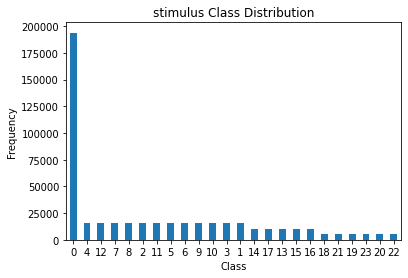

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
13905,0.3589,0.2881,0.1660,0.0024,0.0024,0.0024,0.4834,0.2295,0.0659,0.9033,7,7,2,2
106172,0.0806,0.0024,0.0024,0.1416,0.0049,0.0024,0.1563,0.4028,0.0049,0.0830,0,0,0,0
333314,0.8618,0.2979,0.2026,0.2173,0.0122,0.0439,0.1245,1.0327,0.1196,0.0879,6,6,10,10
107857,0.0244,0.0024,0.0049,0.0903,0.0024,0.0024,0.2246,0.2148,0.0049,0.1392,0,0,0,0
394921,0.0024,0.0024,0.0024,0.0049,0.0049,0.0024,0.0195,0.0049,0.0024,0.0806,0,0,0,0


In [12]:
raw_data.shape

(364904, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364904 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          364904 non-null  float64
 1   Emg2          364904 non-null  float64
 2   Emg3          364904 non-null  float64
 3   Emg4          364904 non-null  float64
 4   Emg5          364904 non-null  float64
 5   Emg6          364904 non-null  float64
 6   Emg7          364904 non-null  float64
 7   Emg8          364904 non-null  float64
 8   Emg9          364904 non-null  float64
 9   Emg10         364904 non-null  float64
 10  repetition    364904 non-null  int64  
 11  rerepetition  364904 non-null  int64  
 12  stimulus      364904 non-null  int64  
 13  restimulus    364904 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 41.8 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 87.87081569175538


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     38104
           1       0.82      0.85      0.83      2099
           2       0.87      0.85      0.86      1914
           3       0.84      0.84      0.84      2255
           4       0.86      0.87      0.86      1818
           5       0.85      0.85      0.85      1809
           6       0.83      0.84      0.83      1892
           7       0.81      0.82      0.81      1918
           8       0.78      0.78      0.78      1790
           9       0.70      0.72      0.71      2140
          10       0.64      0.65      0.64      2007
          11       0.77      0.76      0.77      1897
          12       0.75      0.78      0.76      1891
          13       0.82      0.82      0.82      1233
          14       0.76      0.76      0.76      1292
          15       0.81      0.80      0.81      1372
          16       0.85      0.85      0.85      1510
 

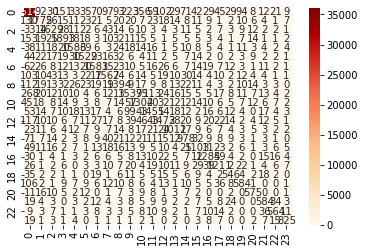

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.8798728436168318
MSE: 9.57391649881476
RMSE: 3.0941746070341214


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8794757757321887
Recall Score :  0.8787081569175539
f1_score :  0.8790527451958174


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 92.33225085981283


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     38104
           1       0.90      0.90      0.90      2099
           2       0.92      0.91      0.91      1914
           3       0.92      0.87      0.89      2255
           4       0.93      0.92      0.92      1818
           5       0.90      0.90      0.90      1809
           6       0.93      0.89      0.91      1892
           7       0.89      0.86      0.88      1918
           8       0.89      0.82      0.85      1790
           9       0.86      0.77      0.81      2140
          10       0.87      0.70      0.77      2007
          11       0.90      0.85      0.88      1897
          12       0.90      0.85      0.87      1891
          13       0.93      0.90      0.91      1233
          14       0.86      0.83      0.85      1292
          15       0.90      0.85      0.87      1372
          16       0.94      0.89      0.91      1510
 

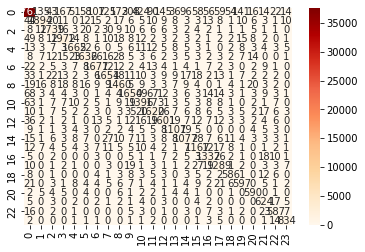

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5917978651977912
MSE: 6.749784190405722
RMSE: 2.5980346784455595


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9220724163795396
Recall Score :  0.9233225085981283
f1_score :  0.921795963545671


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.76850139077294


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     38104
           1       0.95      0.92      0.93      2099
           2       0.97      0.94      0.95      1914
           3       0.96      0.89      0.92      2255
           4       0.97      0.95      0.96      1818
           5       0.95      0.94      0.94      1809
           6       0.97      0.92      0.94      1892
           7       0.95      0.90      0.92      1918
           8       0.94      0.87      0.90      1790
           9       0.91      0.80      0.85      2140
          10       0.93      0.72      0.82      2007
          11       0.94      0.89      0.91      1897
          12       0.95      0.89      0.92      1891
          13       0.97      0.94      0.95      1233
          14       0.92      0.89      0.91      1292
          15       0.95      0.92      0.94      1372
          16       0.98      0.95      0.96      1510
 

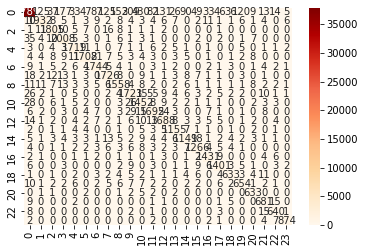

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.4131897343144106
MSE: 4.687809155807676
RMSE: 2.1651349047594417


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9475677819399647
Recall Score :  0.9476850139077294
f1_score :  0.9466201400062003


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[12:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.87570737589236


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     38104
           1       0.88      0.86      0.87      2099
           2       0.91      0.88      0.89      1914
           3       0.92      0.83      0.87      2255
           4       0.90      0.89      0.90      1818
           5       0.89      0.89      0.89      1809
           6       0.92      0.85      0.88      1892
           7       0.87      0.82      0.84      1918
           8       0.85      0.79      0.82      1790
           9       0.82      0.71      0.76      2140
          10       0.87      0.64      0.74      2007
          11       0.85      0.80      0.83      1897
          12       0.83      0.78      0.80      1891
          13       0.89      0.85      0.87      1233
          14       0.83      0.79      0.81      1292
          15       0.87      0.85      0.86      1372
          16       0.90      0.88      0.89      1510
 

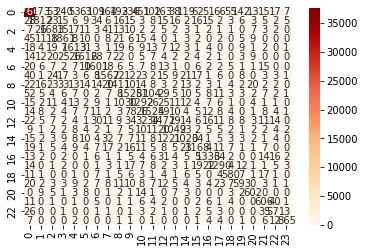

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6526767240788699
MSE: 7.161822940217317
RMSE: 2.6761582427459922


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9067541933995692
Recall Score :  0.9087570737589236
f1_score :  0.9064788633069454


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 95.03706444142996


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     38104
           1       0.96      0.92      0.94      2099
           2       0.97      0.95      0.96      1914
           3       0.97      0.89      0.93      2255
           4       0.98      0.95      0.96      1818
           5       0.96      0.95      0.95      1809
           6       0.97      0.93      0.95      1892
           7       0.96      0.90      0.93      1918
           8       0.95      0.88      0.91      1790
           9       0.92      0.82      0.87      2140
          10       0.94      0.73      0.82      2007
          11       0.95      0.90      0.92      1897
          12       0.96      0.89      0.93      1891
          13       0.98      0.95      0.97      1233
          14       0.94      0.89      0.91      1292
          15       0.96      0.93      0.94      1372
          16       0.98      0.95      0.96      1510
 

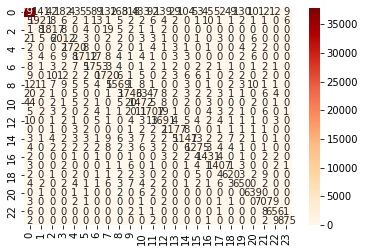

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.4085446897137611
MSE: 4.706266014442115
RMSE: 2.169393005990873


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9506587289899406
Recall Score :  0.9503706444142996
f1_score :  0.9493850853621062
